In [24]:
import tensorflow as tf
import numpy as np

In [25]:
centigrados = np.array([-40, -10, 0, 8, 15, 22, 38, 45, 50, 60, 70, 80, 90, 100], dtype=float)

In [26]:
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100, 113, 122, 140, 158, 176, 194, 212], dtype=float)

In [27]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
oculta3 = tf.keras.layers.Dense(units=6)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2,oculta3, salida])

In [28]:
modelo.compile(
 optimizer= tf.keras.optimizers.Adam(0.1),
 loss = 'mean_squared_error'
)

In [29]:
print("Comenzando entrenamiento.....")
historial = modelo.fit(centigrados, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento.....
Modelo entrenado


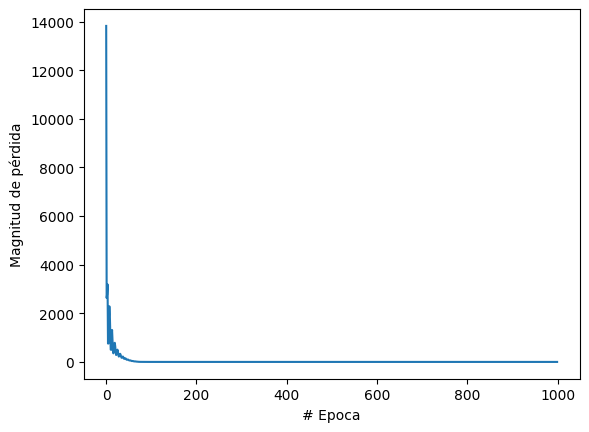

In [31]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [32]:
print("Hagamos una predicción!!!!")
resultado = modelo.predict(np.array([50.00]))
print("EL resultado es" + str (resultado) + "fahrenheit!")

Hagamos una predicción!!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
EL resultado es[[121.97455]]fahrenheit!


In [33]:
print("Variables internas del modelo")
print (oculta1.get_weights())
print (oculta2.get_weights())
print (salida.get_weights())

Variables internas del modelo
[array([[-0.0495404 , -0.1034363 , -0.98831224]], dtype=float32), array([-0.30458078,  1.8919729 , -3.7970026 ], dtype=float32)]
[array([[-0.22450309,  0.5120679 , -0.18246908],
       [ 0.44104803,  0.39536572,  0.02164313],
       [-0.89667547, -0.32305   ,  0.15311204]], dtype=float32), array([3.995129  , 2.5885816 , 0.19390404], dtype=float32)]
[array([[-0.5708993 ],
       [-0.67543405],
       [ 0.18099843],
       [ 0.06194463],
       [ 0.8762531 ],
       [-0.42355704]], dtype=float32), array([3.1436102], dtype=float32)]
